In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import warnings

warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("data_vad.csv")
df.head()

msec      Corr       Zyg       Mas  Valence  Arousal            filename  \
0  6894  9.995796  3.605905  5.988728      NaN      NaN  For_Dolenko/3.xlsx   
1  6895  9.988364  3.628362  6.000079      NaN      NaN  For_Dolenko/3.xlsx   
2  6896  9.980556  3.650771  6.011084      NaN      NaN  For_Dolenko/3.xlsx   
3  6897  9.971981  3.673069  6.021702      NaN      NaN  For_Dolenko/3.xlsx   
4  6898  9.962270  3.695192  6.031901      NaN      NaN  For_Dolenko/3.xlsx   

   label batch_id  
0      3      3_0  
1      3      3_0  
2      3      3_0  
3      3      3_0  
4      3      3_0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165165 entries, 0 to 165164
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   msec      165165 non-null  int64  
 1   Corr      165165 non-null  float64
 2   Zyg       165165 non-null  float64
 3   Mas       165165 non-null  float64
 4   Valence   3632 non-null    float64
 5   Arousal   3632 non-null    float64
 6   filename  165165 non-null  object 
 7   label     165165 non-null  int64  
 8   batch_id  165165 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 11.3+ MB


In [16]:
data = df.drop(["filename", "label"], axis = 1)
data.head()

msec      Corr       Zyg       Mas  Valence  Arousal batch_id
0  6894  9.995796  3.605905  5.988728      NaN      NaN      3_0
1  6895  9.988364  3.628362  6.000079      NaN      NaN      3_0
2  6896  9.980556  3.650771  6.011084      NaN      NaN      3_0
3  6897  9.971981  3.673069  6.021702      NaN      NaN      3_0
4  6898  9.962270  3.695192  6.031901      NaN      NaN      3_0

# Распределение переменных по отдельности

### Переменная "msec"

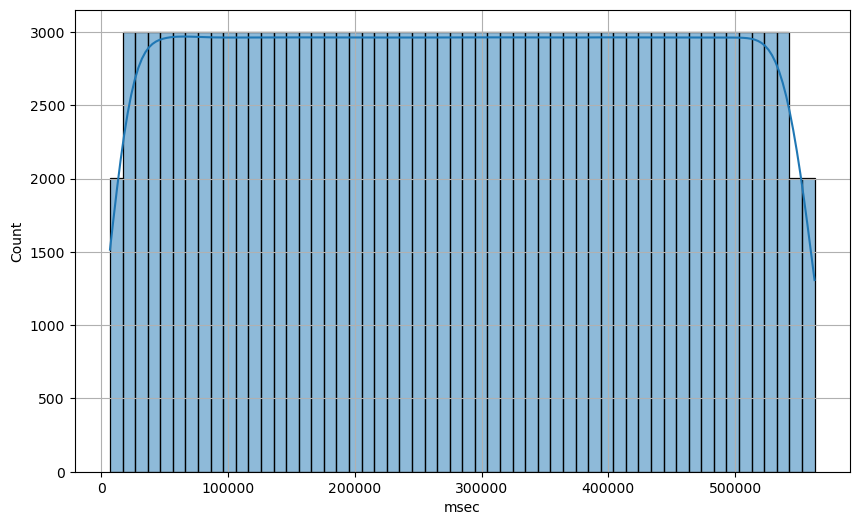

In [11]:
fig = plt.subplots(figsize = (10, 6))
sns.histplot(data = data, x = "msec", kde = True)
plt.grid()
plt.show()

### Распределение выглядит нормально, как и следовало ожидать от распределения времени.

# Распределение переменной "Zyg"

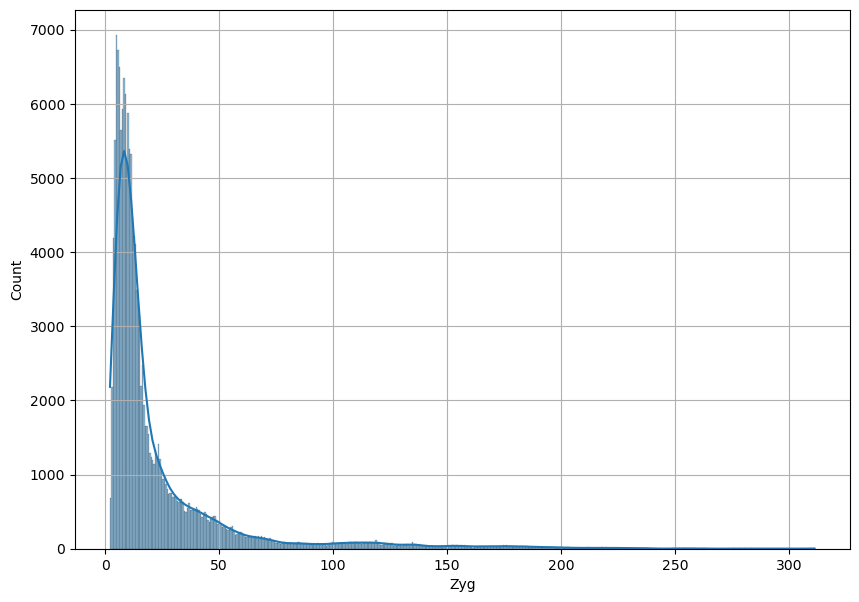

In [14]:
fig = plt.subplots(figsize = (10, 7))
sns.histplot(data = data, x = "Zyg", kde = True)
plt.grid()
plt.show()

#### Распределение смещенно влево, что может свидетельствовать о выбросах.

# Распределение переменной "Mas"

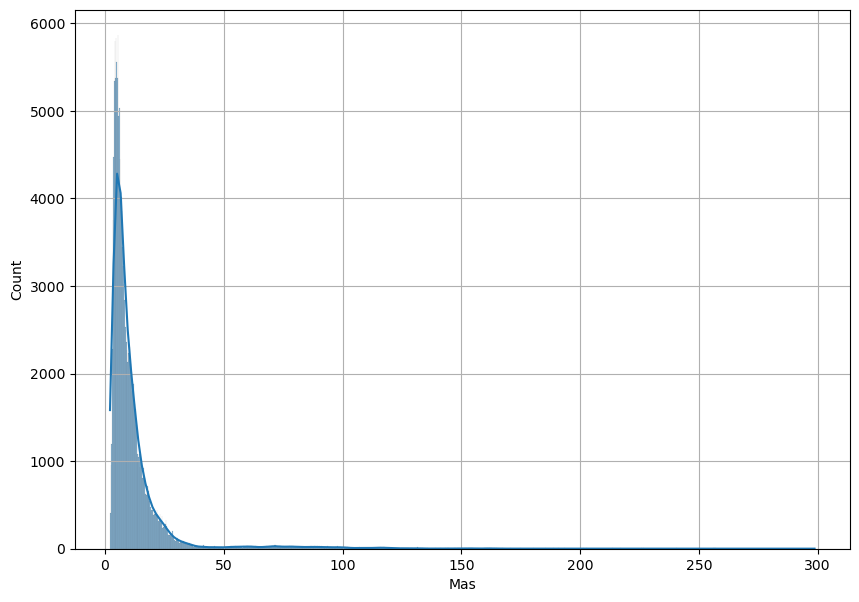

In [15]:
fig = plt.subplots(figsize = (10, 7))
sns.histplot(data = data, x = "Mas", kde = True)
plt.grid()
plt.show()

#### Распределение смещенно влево, что может свидетельствовать о выбросах.

# Распределение переменной "Corr"

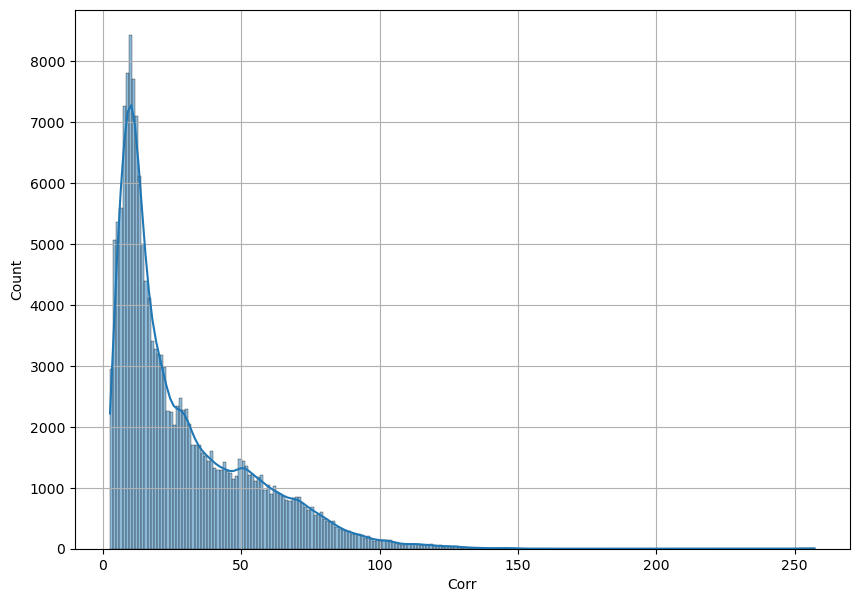

In [19]:
fig = plt.subplots(figsize = (10, 7))
sns.histplot(data = data, x = "Corr", kde = True)
plt.grid()
plt.show()

#### Распределение смещенно влево, что может свидетельствовать о выбросах.

# Распределение переменной "Valence"

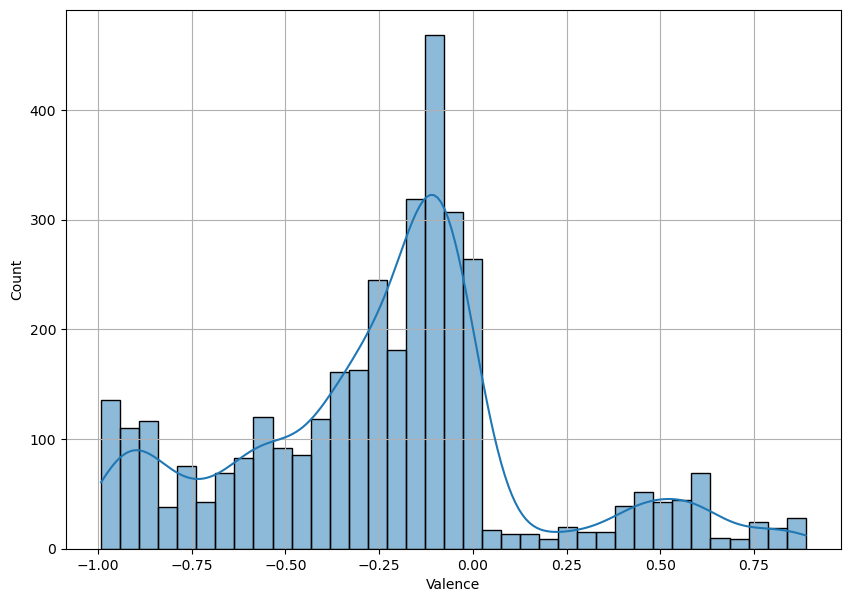

In [20]:
fig = plt.subplots(figsize = (10, 7))
sns.histplot(data = data, x = "Valence", kde = True)
plt.grid()
plt.show()

# Распределение переменной "Arousal"

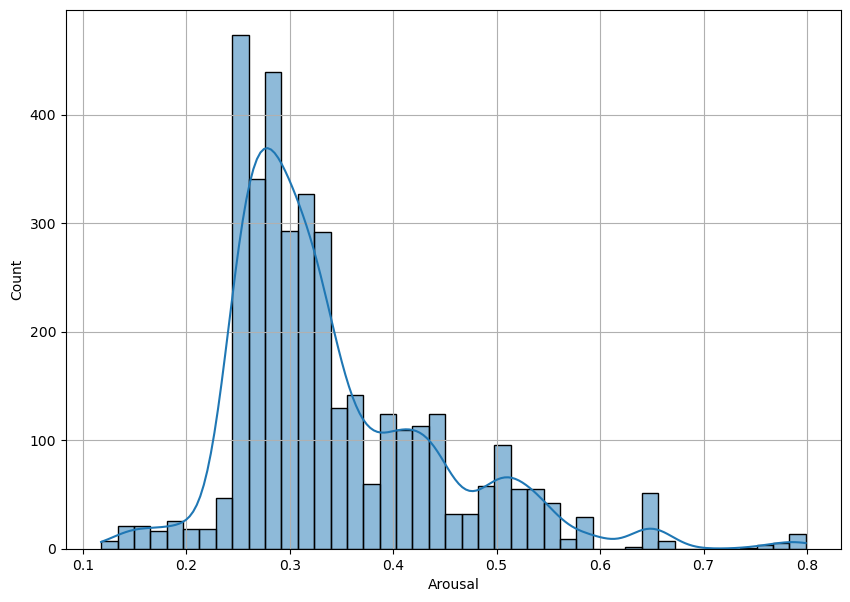

In [21]:
fig = plt.subplots(figsize = (10, 7))
sns.histplot(data = data, x = "Arousal", kde = True)
plt.grid()
plt.show()

# Посмотрим на зависимости между переменными

In [25]:
new_df = data[(data["Arousal"].notna())&(data["Valence"].notna())]

In [27]:
new_df.corr()

msec      Corr       Zyg       Mas   Valence   Arousal
msec     1.000000 -0.004698 -0.044648 -0.047304  0.022701  0.057306
Corr    -0.004698  1.000000 -0.213923 -0.098048 -0.156296  0.259311
Zyg     -0.044648 -0.213923  1.000000  0.299039  0.439574 -0.030578
Mas     -0.047304 -0.098048  0.299039  1.000000  0.058302 -0.161369
Valence  0.022701 -0.156296  0.439574  0.058302  1.000000 -0.056596
Arousal  0.057306  0.259311 -0.030578 -0.161369 -0.056596  1.000000

#### Небольшие корреляции наблюдаются между переменными: 
- Corr и Zyg
- Corr и Arousal
- Zyg и Mas
- Zyg и Valence

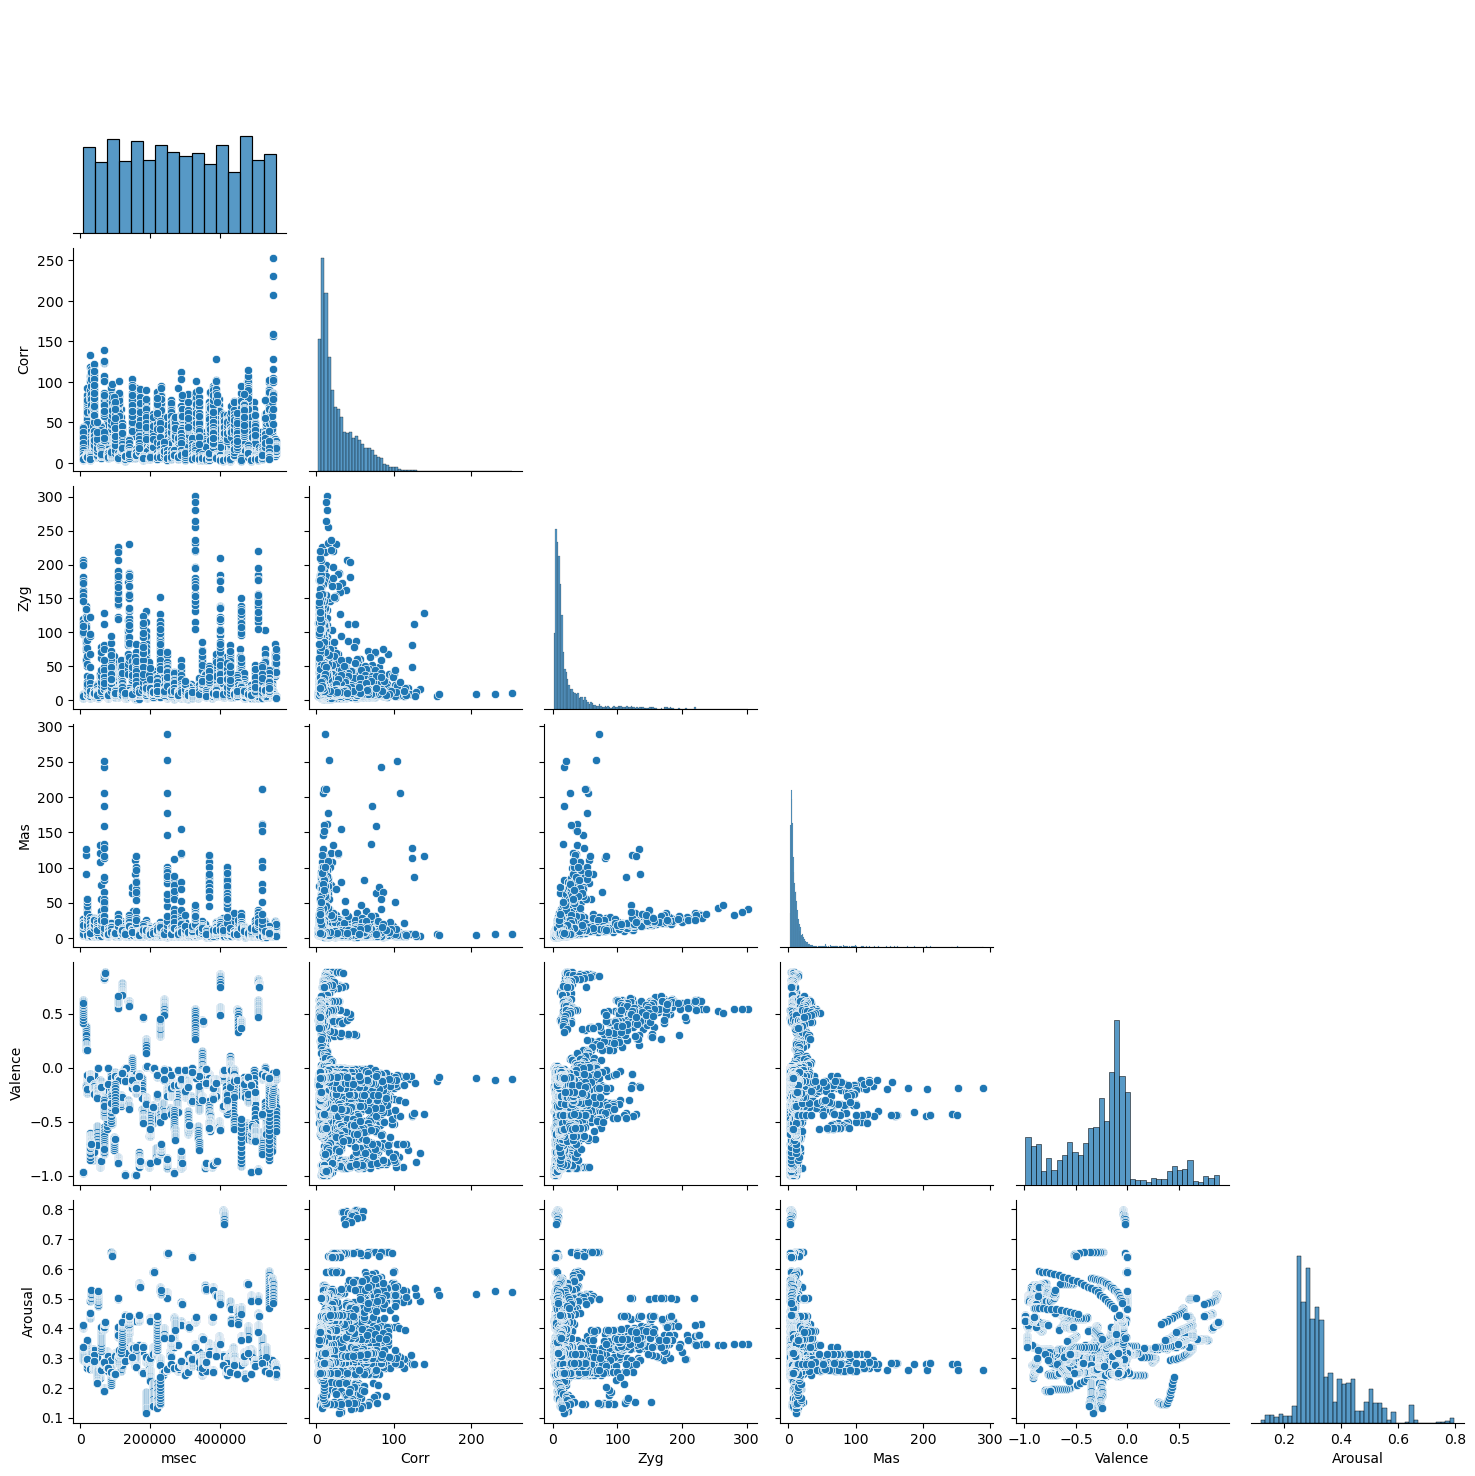

In [31]:
sns.pairplot(new_df, corner = True)

# Посмотрим в отдельности на зависимости между переменными с небольшими корреляциями.

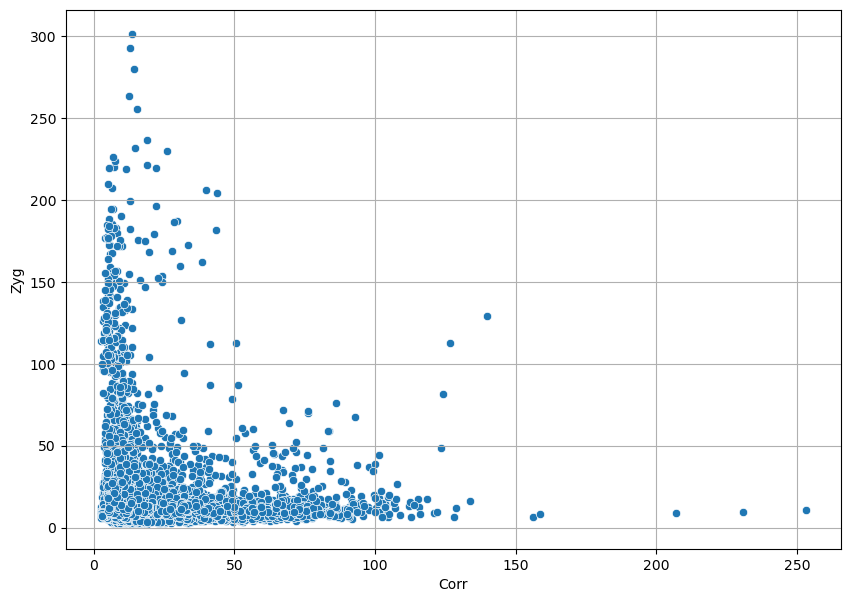

In [30]:
fig = plt.subplots(figsize = (10, 7))
sns.scatterplot(new_df, x = 'Corr', y = 'Zyg')
plt.grid()
plt.show()

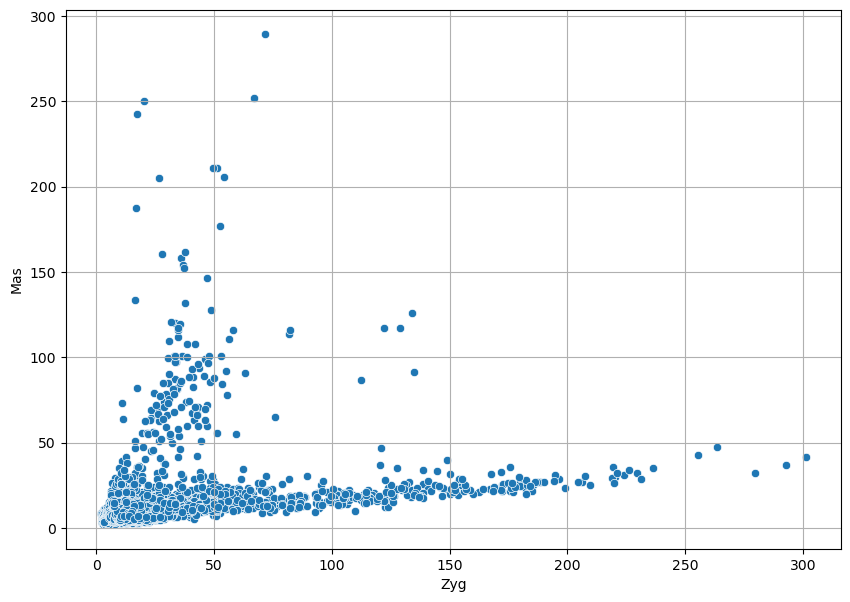

In [32]:
fig = plt.subplots(figsize = (10, 7))
sns.scatterplot(new_df, x = 'Zyg', y = 'Mas')
plt.grid()
plt.show()

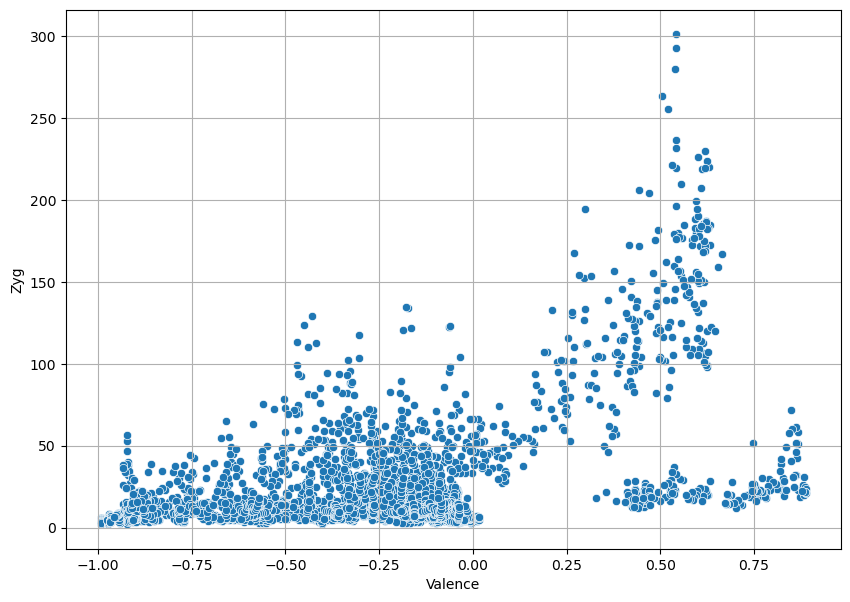

In [33]:
fig = plt.subplots(figsize = (10, 7))
sns.scatterplot(new_df, x = 'Valence', y = 'Zyg')
plt.grid()
plt.show()

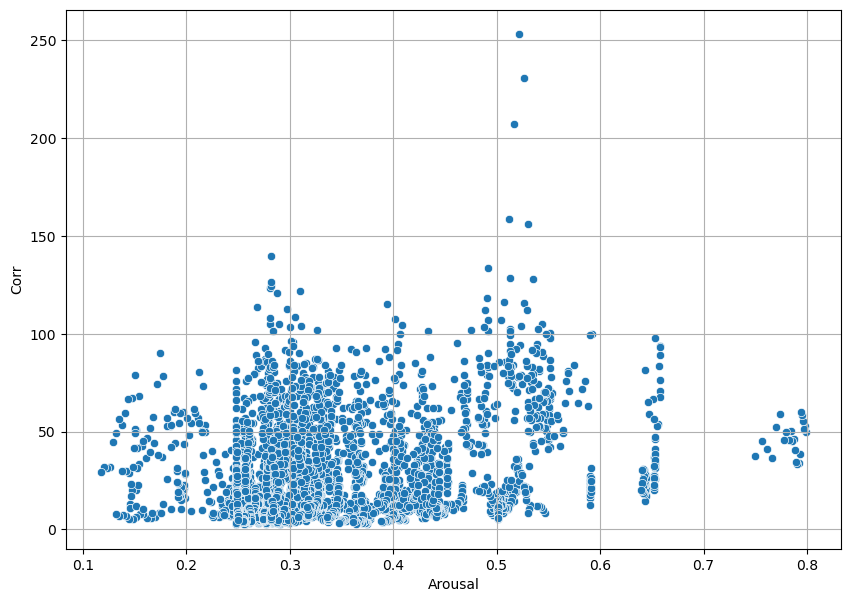

In [34]:
fig = plt.subplots(figsize = (10, 7))
sns.scatterplot(new_df, x = 'Arousal', y = 'Corr')
plt.grid()
plt.show()

#### Посмотрим на данные в отдельных эксперементах с помощью boxplot и дентификатора эксперимента - label

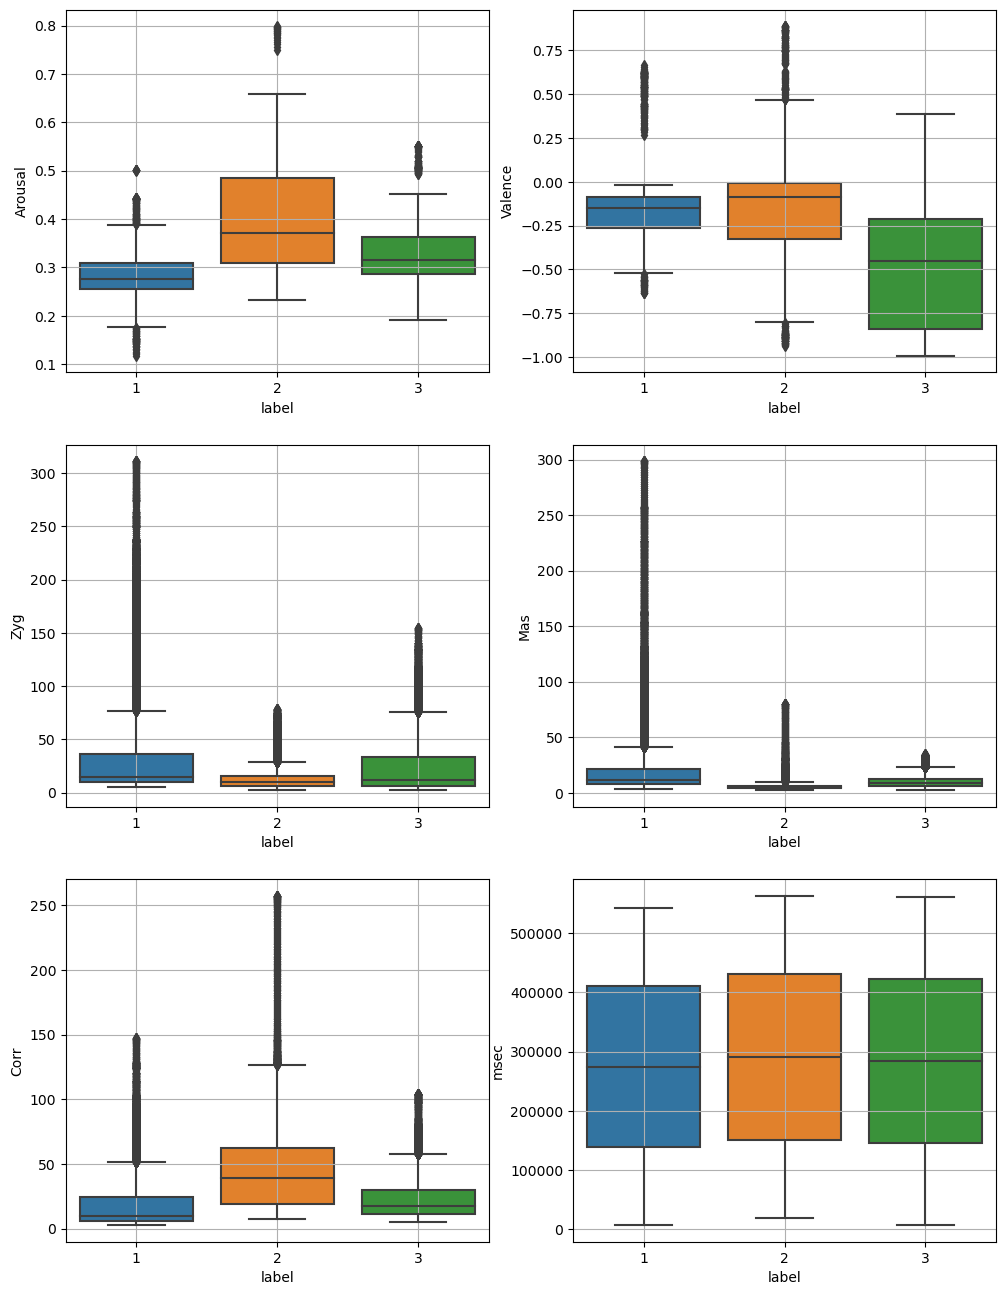

In [55]:
plt.figure(figsize=(12, 16))

plt.subplot(321)
sns.boxplot(data = df, x = "label", y = "Arousal")
plt.grid()

plt.subplot(322)
sns.boxplot(data = df, x = "label", y = "Valence")
plt.grid()

plt.subplot(323)
sns.boxplot(data = df, x = "label", y = "Zyg")
plt.grid()

plt.subplot(324)
sns.boxplot(data = df, x = "label", y = "Mas")
plt.grid()

plt.subplot(325)
sns.boxplot(data = df, x = "label", y = "Corr")
plt.grid()

plt.subplot(326)
sns.boxplot(data = df, x = "label", y = "msec")
plt.grid()

plt.show()

#### Из графиков boxplotot видно, что в "Mas", "Zyg", "Corr", "Valence" и "Arousal" присутсвуют выбросы. 

# Обнаружим с помощью межквартильного размаха в каких сигналах присутствуют выбросы. 

In [56]:
dict_outlier = {"Corr":{}, "Zyg":{}, "Mas":{}, "Valence":{}, "Arousal":{}}
dict_time = {"Corr":{}, "Zyg":{}, "Mas":{}, "Valence":{}, "Arousal":{}}
dict_median = {"Corr":{}, "Zyg":{}, "Mas":{}, "Valence":{}, "Arousal":{}}
dict_q5 = {"Corr":{}, "Zyg":{}, "Mas":{}, "Valence":{}, "Arousal":{}}
dict_q95 = {"Corr":{}, "Zyg":{}, "Mas":{}, "Valence":{}, "Arousal":{}}

In [57]:
for name_column in data.columns[1:6]:
    q1 = data[name_column].quantile(q = 0.25)
    q3 = data[name_column].quantile(q = 0.75)
    low = q1-3*(q3-q1)
    high = q3 + 3*(q3-q1)
    for arr_id in data["batch_id"].unique():
        bool_outlier = data[data["batch_id"] == arr_id][name_column].apply(lambda x: (x > high)|(x < low))
        outlier = data[(data["batch_id"] == arr_id)&(bool_outlier)][name_column]
        count_outlier = outlier.count()
        if count_outlier != 0:
            dict_outlier[name_column][arr_id] = outlier
            dict_time[name_column][arr_id] = data[(data["batch_id"] == arr_id)&(bool_outlier)]["msec"]

# Визуализируем выбросы для каждой переменной

### "Corr"

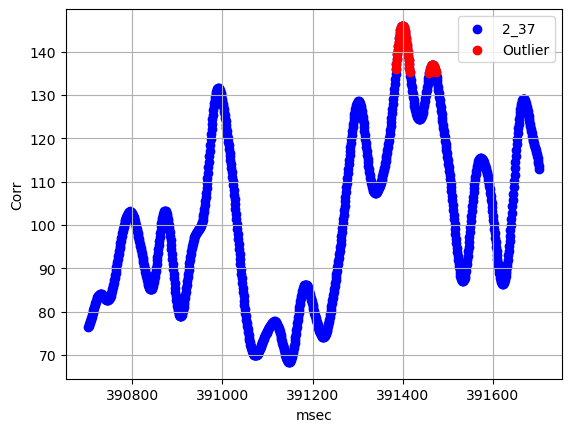

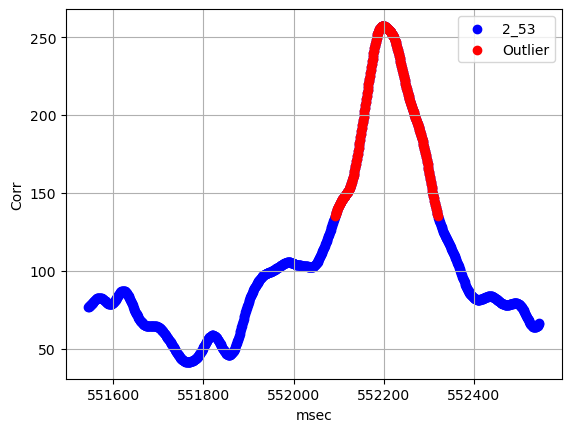

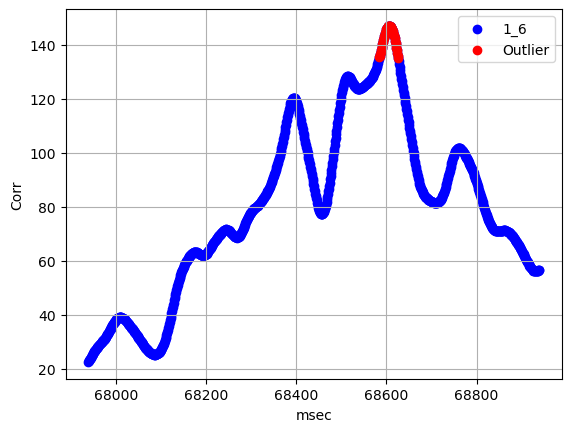

In [23]:
for signal_id in dict_outlier["Corr"].keys():
    plt.scatter(x = data[data["batch_id"] == signal_id]["msec"], y = data[data["batch_id"] == signal_id]["Corr"], color = "b", label = signal_id)
    plt.scatter(x = dict_time["Corr"][signal_id], y = dict_outlier["Corr"][signal_id], color = "r", label = "Outlier")
    plt.legend()
    plt.xlabel("msec")
    plt.ylabel("Corr")
    plt.grid()
    plt.show()

### "Mas"

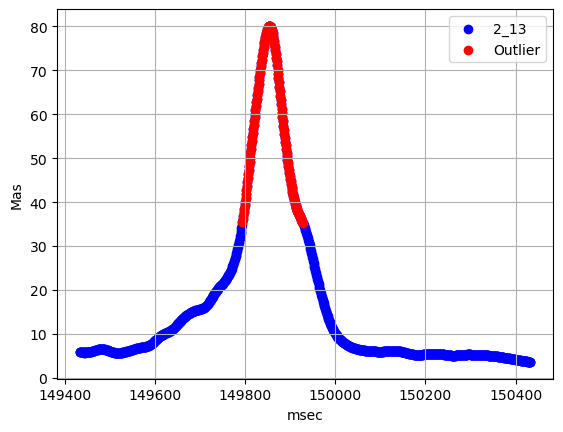

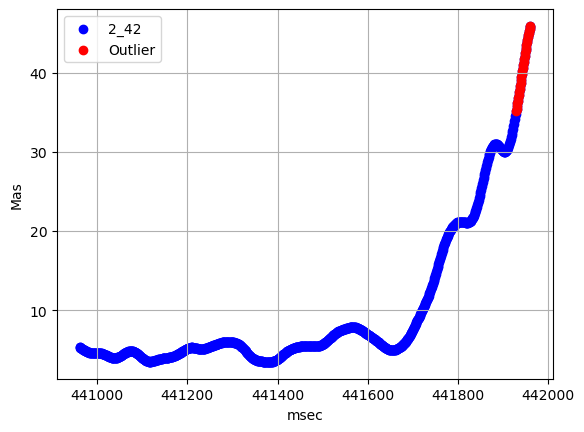

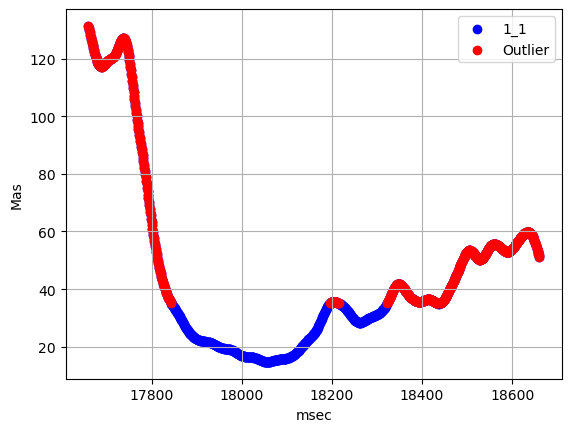

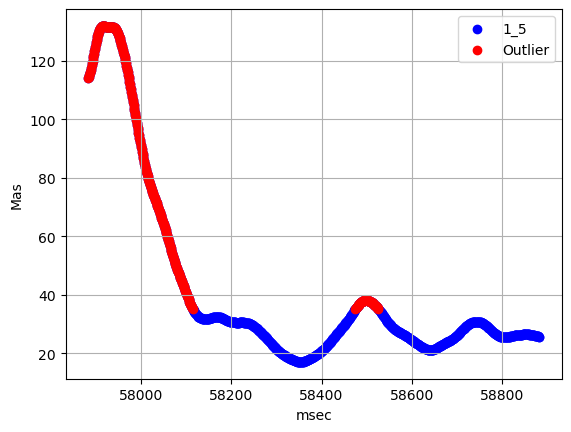

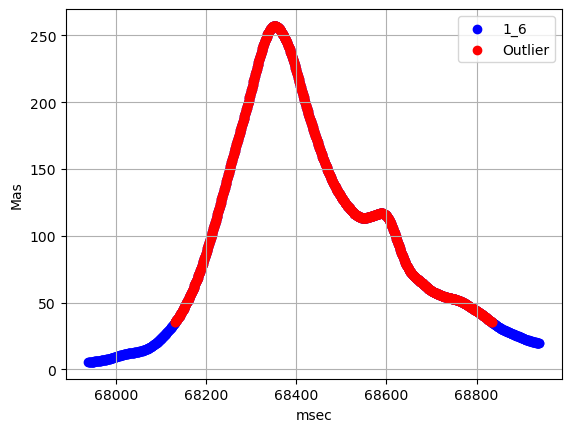

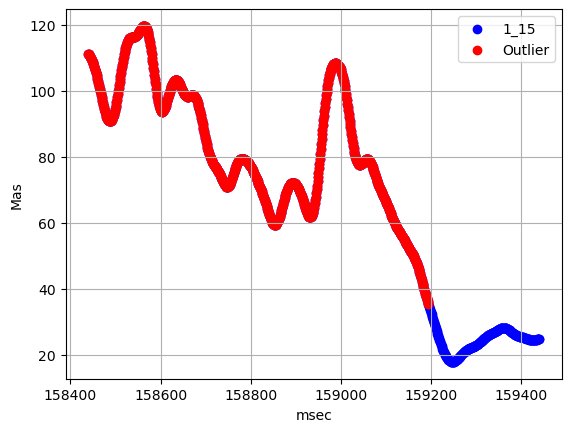

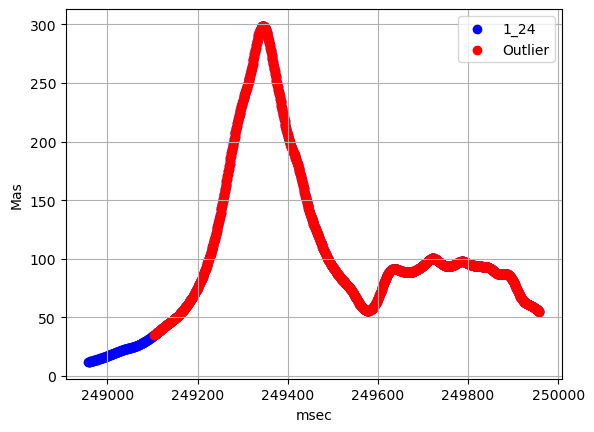

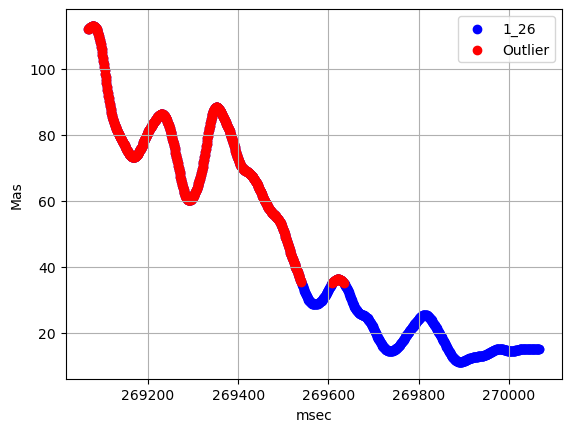

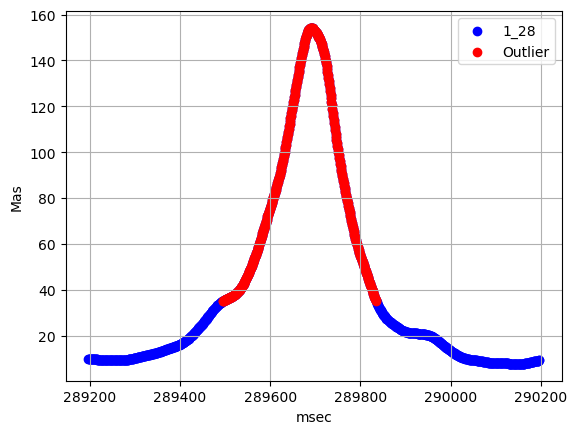

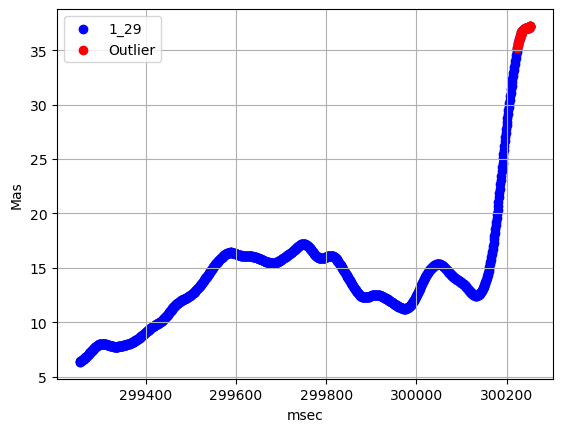

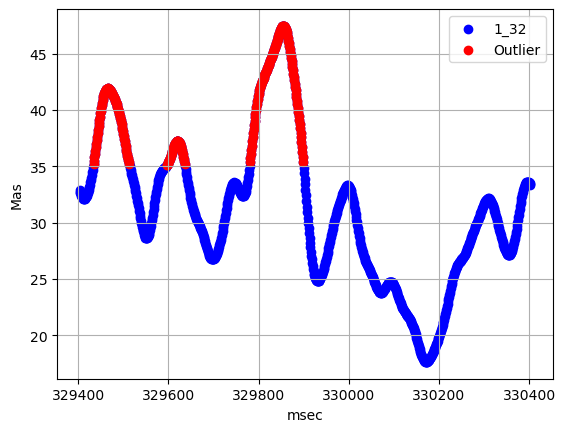

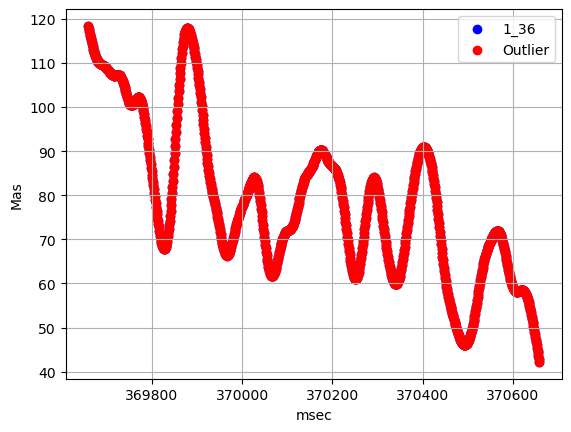

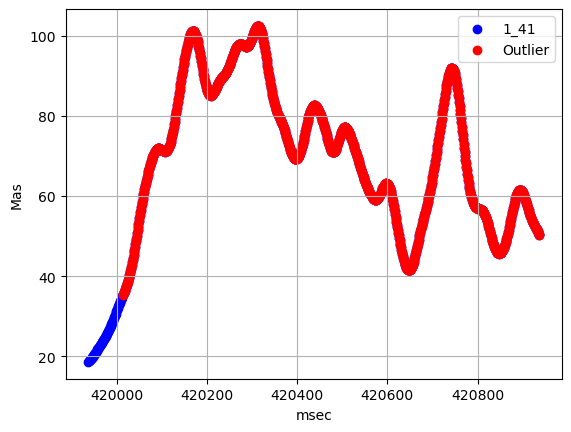

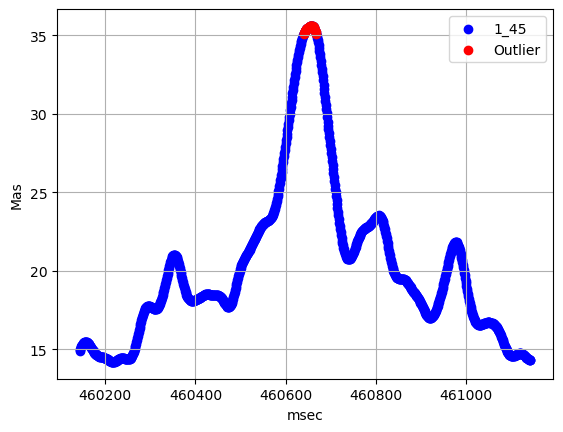

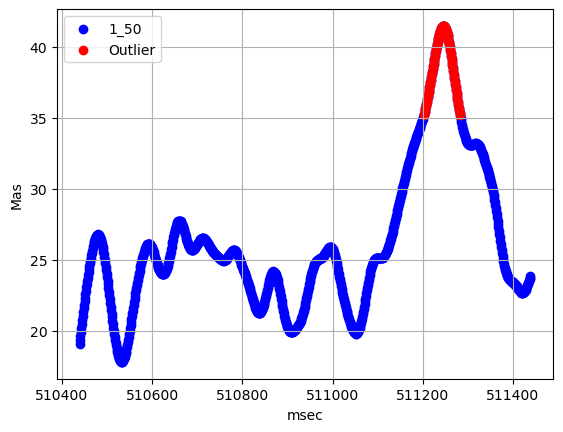

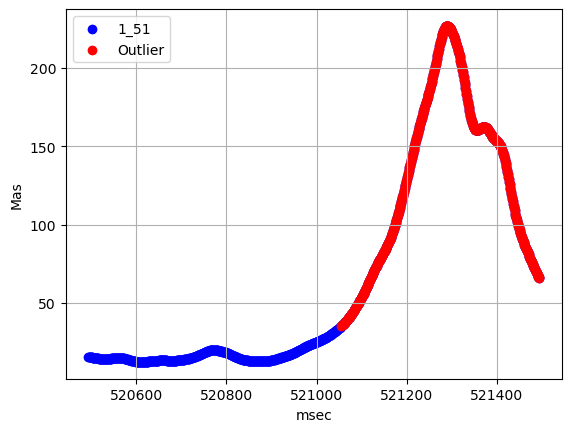

In [24]:
for signal_id in dict_outlier["Mas"].keys():
    plt.scatter(x = data[data["batch_id"] == signal_id]["msec"], y = data[data["batch_id"] == signal_id]["Mas"], color = "b", label = signal_id)
    plt.scatter(x = dict_time["Mas"][signal_id], y = dict_outlier["Mas"][signal_id], color = "r", label = "Outlier")
    plt.legend()
    plt.xlabel("msec")
    plt.ylabel("Mas")
    plt.grid()
    plt.show()

### "Zyg"


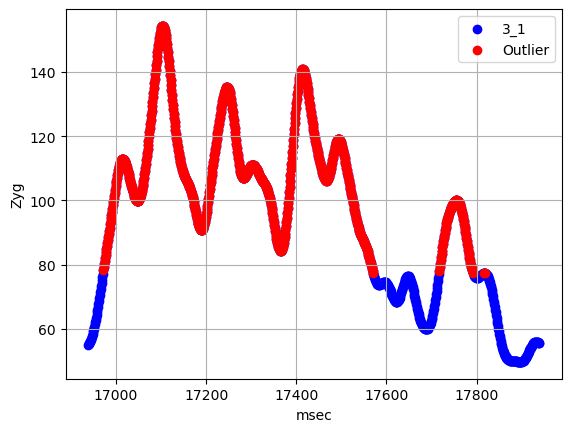

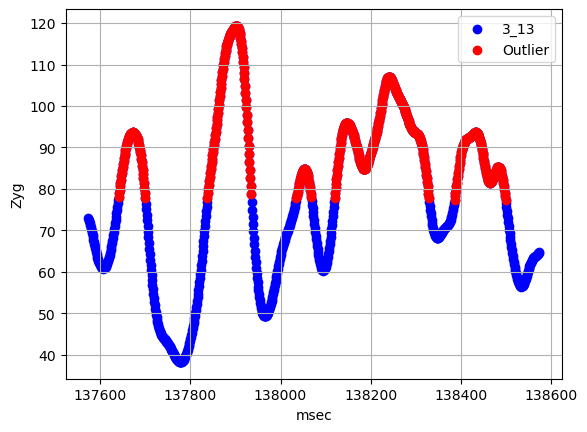

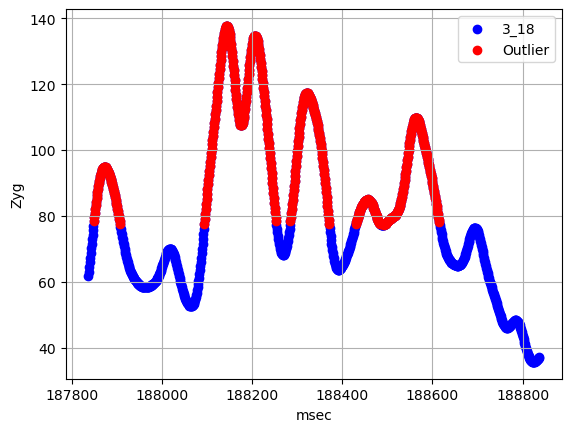

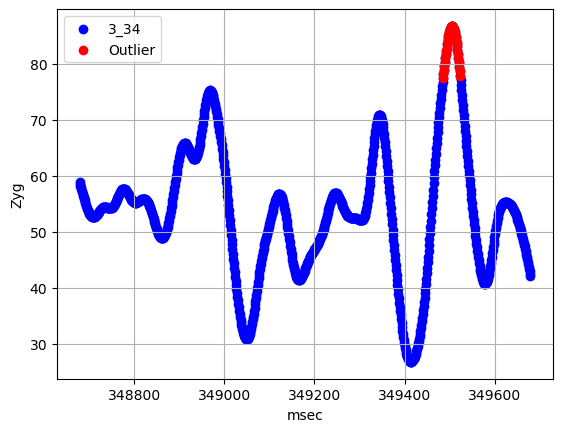

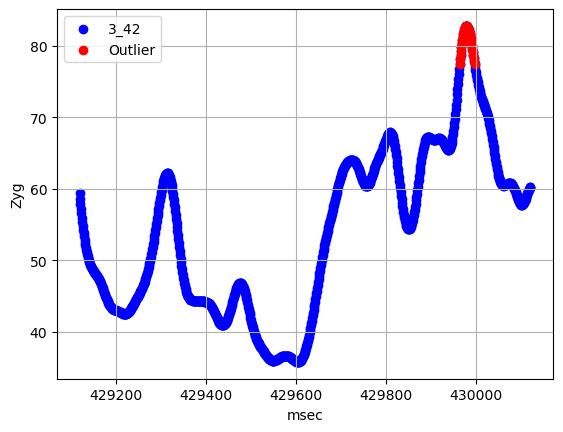

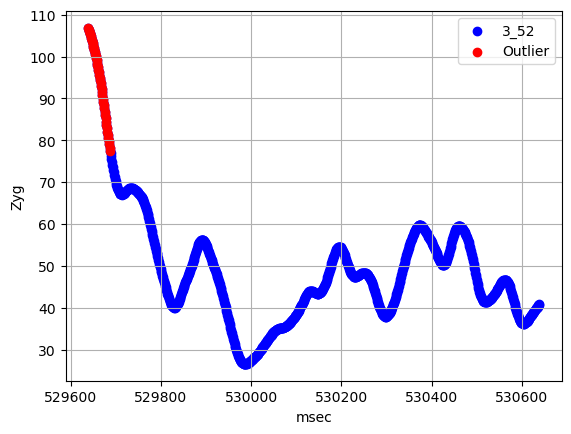

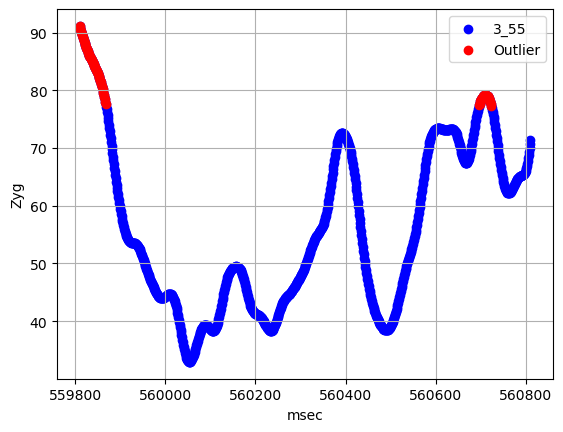

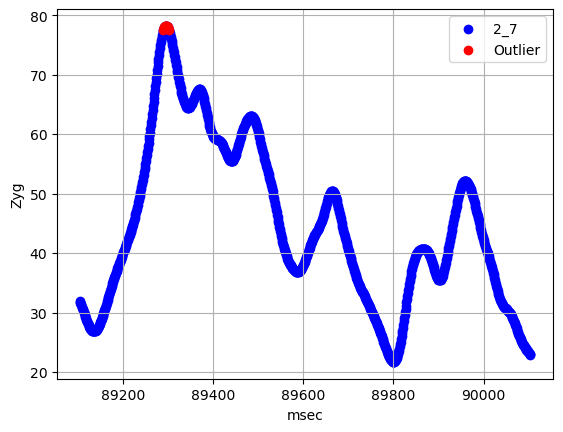

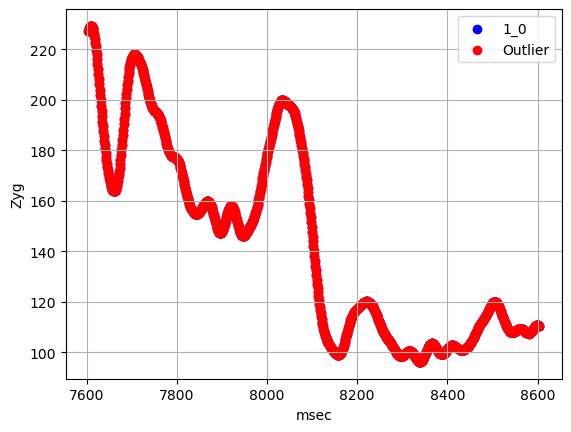

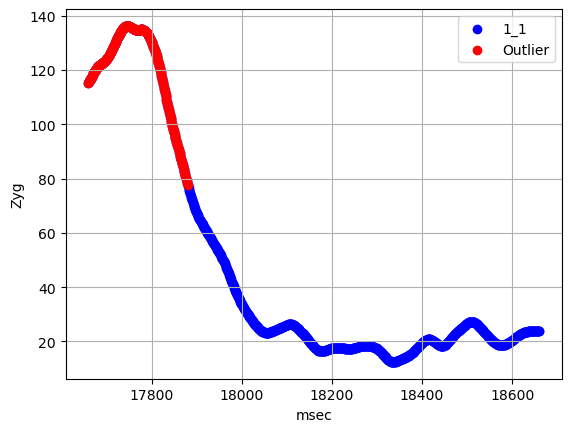

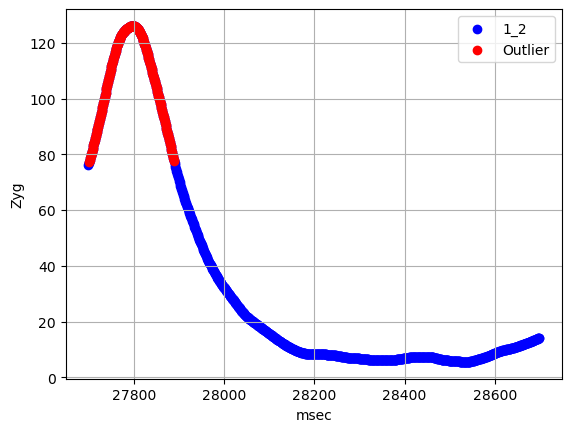

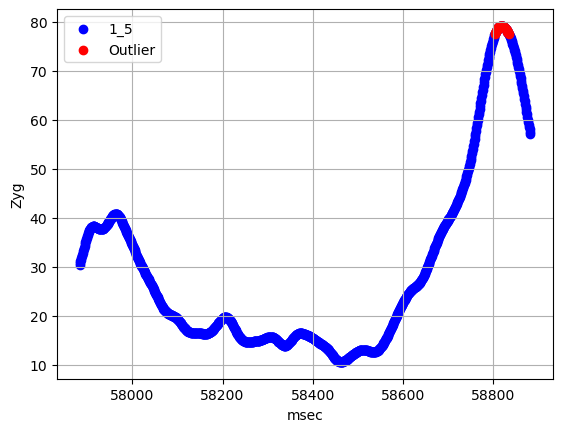

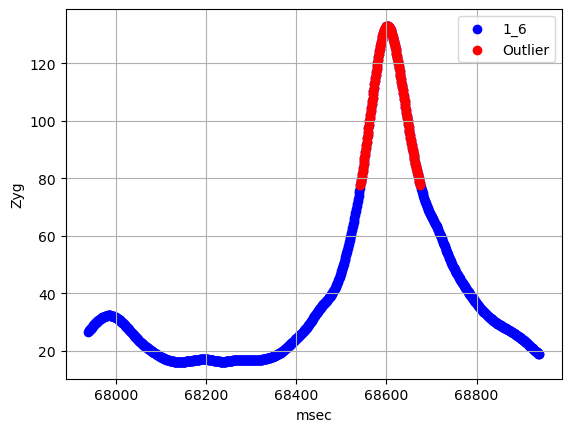

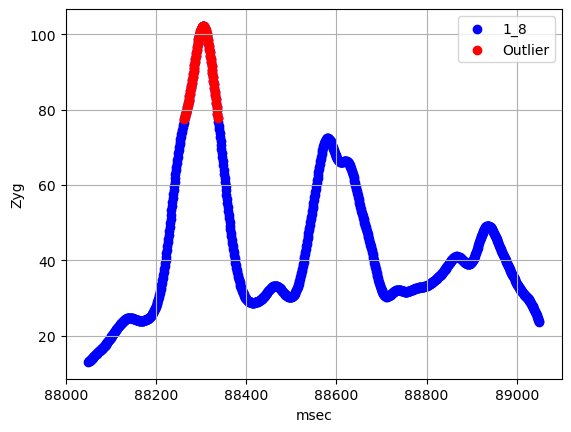

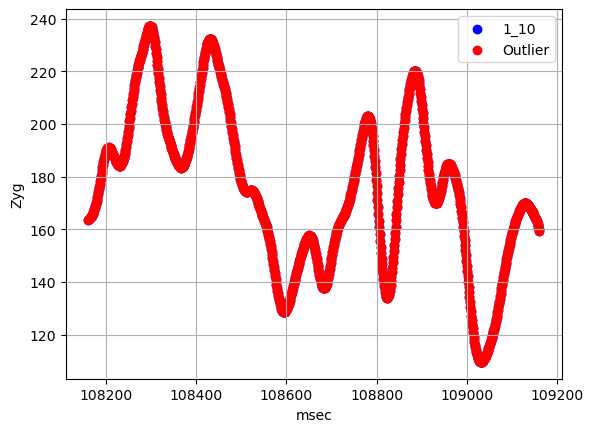

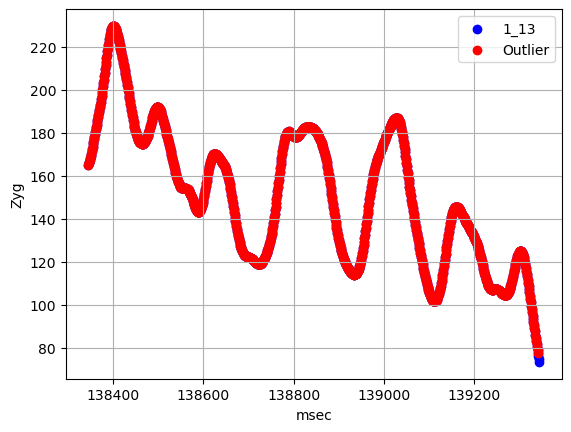

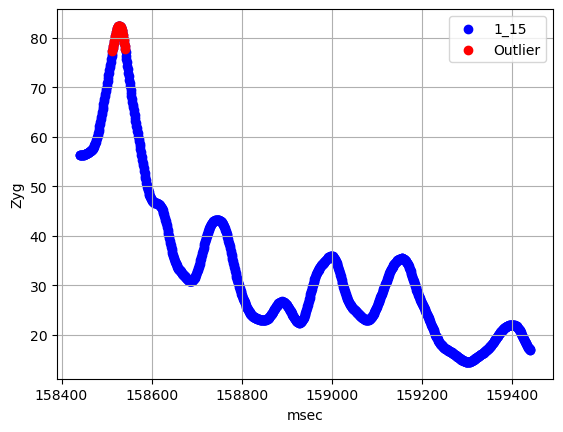

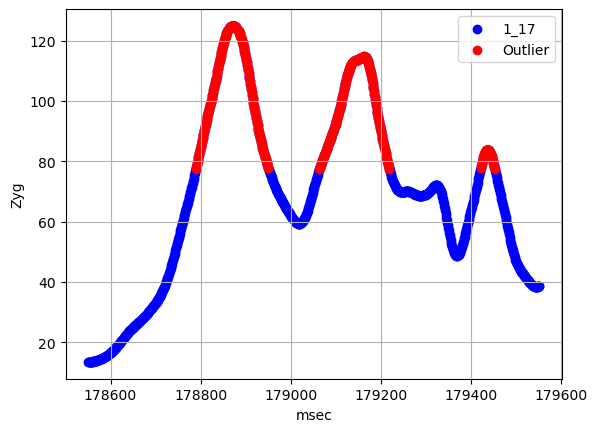

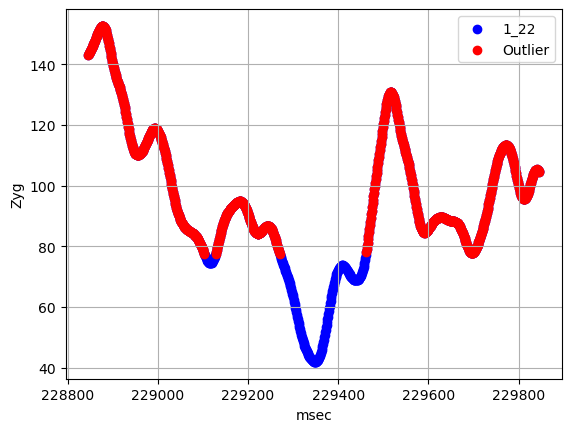

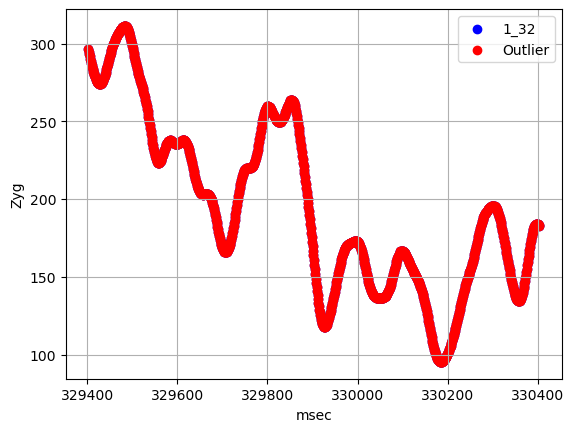

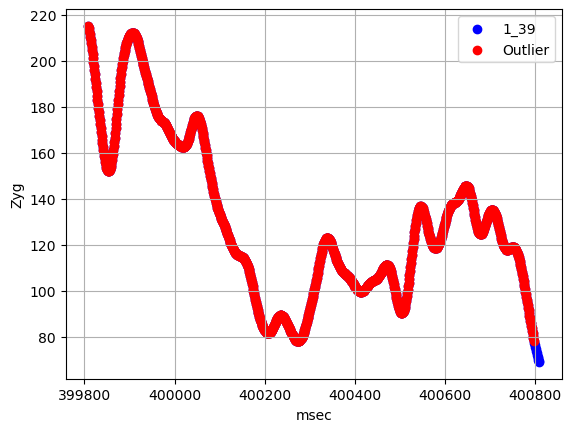

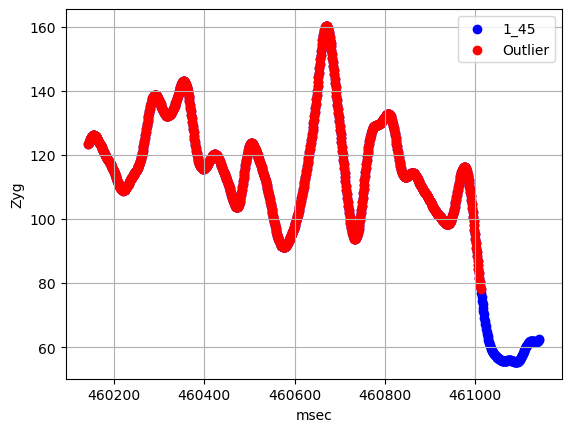

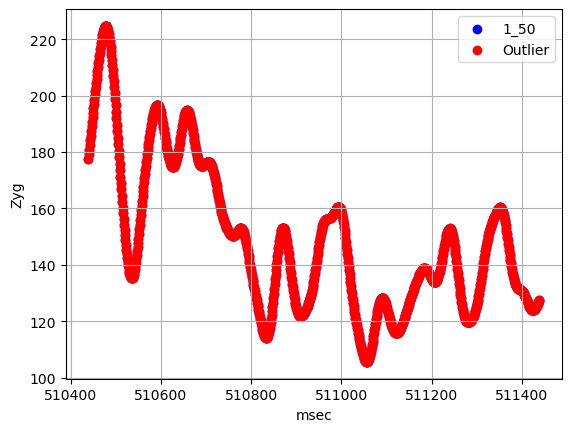

In [25]:
for signal_id in dict_outlier["Zyg"].keys():
    plt.scatter(x = data[data["batch_id"] == signal_id]["msec"], y = data[data["batch_id"] == signal_id]["Zyg"], color = "b", label = signal_id)
    plt.scatter(x = dict_time["Zyg"][signal_id], y = dict_outlier["Zyg"][signal_id], color = "r", label = "Outlier")
    plt.legend()
    plt.xlabel("msec")
    plt.ylabel("Zyg")
    plt.grid()
    plt.show()

### "Arousal"

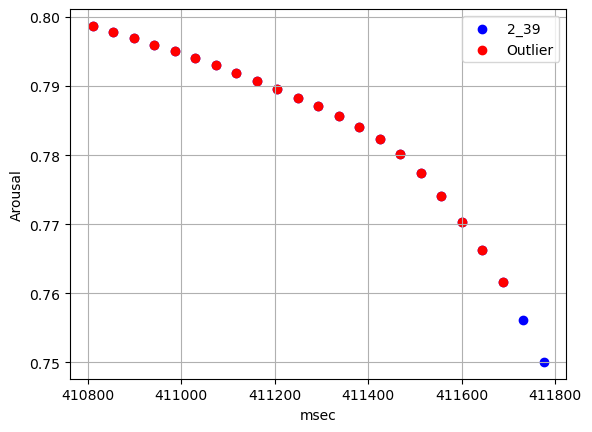

In [26]:
for signal_id in dict_outlier["Arousal"].keys():
    plt.scatter(x = data[data["batch_id"] == signal_id]["msec"], y = data[data["batch_id"] == signal_id]["Arousal"], color = "b", label = signal_id)
    plt.scatter(x = dict_time["Arousal"][signal_id], y = dict_outlier["Arousal"][signal_id], color = "r", label = "Outlier")
    plt.legend()
    plt.xlabel("msec")
    plt.ylabel("Arousal")
    plt.grid()
    plt.show()

### "Valence"

In [28]:
for signal_id in dict_outlier["Valence"].keys():
    plt.scatter(x = data[data["batch_id"] == signal_id]["msec"], y = data[data["batch_id"] == signal_id]["Valence"], color = "b")
    plt.scatter(x = dict_time["Valence"][signal_id], y = dict_outlier["Valence"][signal_id], color = "r", label = "Outlier")
    plt.legend()
    plt.xlabel("msec")
    plt.ylabel("Valence")
    plt.grid()
    plt.show()

## Такой способ поиска выбросов не учитывает расширение диапазона сигнала.
Поэтому пробую найти, где выбросы являются выбросами, а где просто расширением диапазона сигнала.

In [66]:
def graphic_med(data):
    #Выбросы
    dict_outlier = {"Corr":{}, "Zyg":{}, "Mas":{}, "Valence":{}, "Arousal":{}}
    dict_time = {"Corr":{}, "Zyg":{}, "Mas":{}, "Valence":{}, "Arousal":{}}
    dict_median = {"Corr":{}, "Zyg":{}, "Mas":{}, "Valence":{}, "Arousal":{}}
    dict_q5 = {"Corr":{}, "Zyg":{}, "Mas":{}, "Valence":{}, "Arousal":{}}
    dict_q95 = {"Corr":{}, "Zyg":{}, "Mas":{}, "Valence":{}, "Arousal":{}}
    for name_column in data.columns[1:6]:
        q1 = data[name_column].quantile(q = 0.25)
        q3 = data[name_column].quantile(q = 0.75)
        low = q1-3*(q3-q1)
        high = q3 + 3*(q3-q1)
        for arr_id in data["batch_id"].unique():
            bool_outlier = data[data["batch_id"] == arr_id][name_column].apply(lambda x: (x > high)|(x < low))
            outlier = data[(data["batch_id"] == arr_id)&(bool_outlier)][name_column]
            count_outlier = outlier.count()
            if count_outlier != 0:
                dict_outlier[name_column][arr_id] = outlier
                dict_time[name_column][arr_id] = data[(data["batch_id"] == arr_id)&(bool_outlier)]["msec"]
    #Медиана,5 и 95 персентили
    for i in data.columns[1:6]:
        for s_id in data["batch_id"].unique():
            dict_median[i][s_id] = data[data["batch_id"] == s_id][i].median()
            dict_q5[i][s_id] = data[data["batch_id"] == s_id][i].quantile(q = 0.05)
            dict_q95[i][s_id] = data[data["batch_id"] == s_id][i].quantile(q = 0.95)
    med = pd.DataFrame(dict_median)
    q5 = pd.DataFrame(dict_q5)
    q95 = pd.DataFrame(dict_q95)
    med_arr = {"Corr":[], "Zyg":[], "Mas":[], "Valence":[], "Arousal":[]}
    arr_5 = {"Corr":[], "Zyg":[], "Mas":[], "Valence":[], "Arousal":[]}
    arr_95 = {"Corr":[], "Zyg":[], "Mas":[], "Valence":[], "Arousal":[]}
    arr = {"Corr":[], "Zyg":[], "Mas":[], "Valence":[], "Arousal":[]}
    for i in med.columns:
        for j in dict_outlier[i].keys():
            med_arr[i].append(med[i][j])
            arr_5[i].append(q5[i][j])
            arr_95[i].append(q95[i][j])
            arr[i].append(list(med.index).index(j))
    l = med["Corr"].count()
    bool_corr = data["batch_id"].apply(lambda x: x in dict_outlier["Corr"].keys())
    bool_Zyg = data["batch_id"].apply(lambda x: x in dict_outlier["Zyg"].keys())
    bool_Mas = data["batch_id"].apply(lambda x: x in dict_outlier["Mas"].keys())
    df_new = data[~(bool_corr)|(bool_Zyg)|(bool_Mas)]
    for i in med.columns[:3]:
        plt.scatter(np.arange(l), med[i], c = "grey", label = "median")
        plt.scatter(np.arange(l), q5[i], c = "k", label = "0.05")
        plt.scatter(np.arange(l), q95[i], c = "silver", label = "0.95")
        plt.scatter(arr[i], med_arr[i], c = "orange" , label = "out_median")
        plt.scatter(arr[i], arr_5[i], c = "b", label = "out_0.05")
        plt.scatter(arr[i], arr_95[i], c = "r", label = "out_0.95")
        plt.plot(np.arange(l), [data[i].median()]*l, c = "pink", label = "median_norm")
        plt.plot(np.arange(l), [data[i].quantile(q = 0.05)]*l, c = "plum", label = "0.05_norm")
        plt.plot(np.arange(l), [q95[i].quantile(q = 0.95)]*l, c = "m", label = "0.95_norm")
        plt.legend()
        plt.xlabel("N")
        plt.ylabel(i)
        plt.grid()
        plt.show()
    return data[~((bool_Zyg)|(bool_corr)|(bool_Mas))]

In [67]:
df_new = df[(df["Arousal"].notna())&(df["Valence"].notna())]

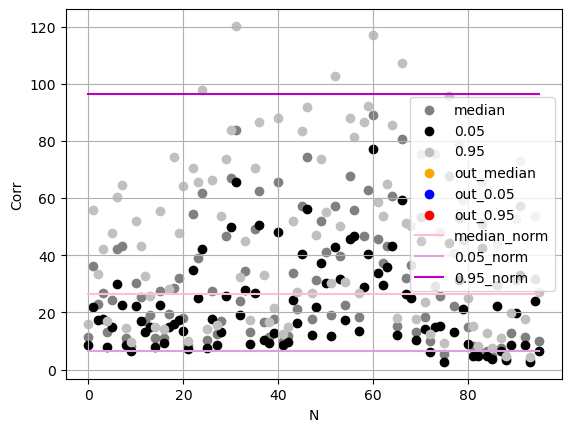

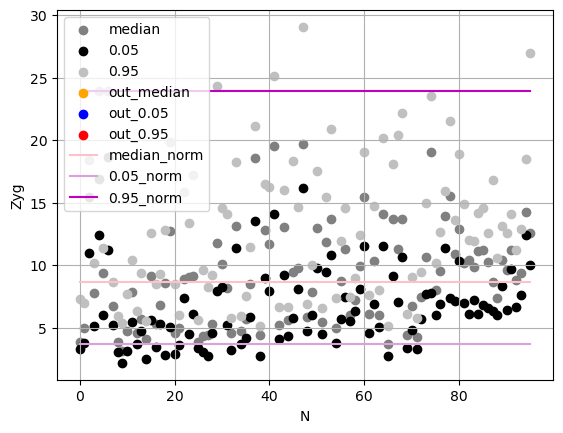

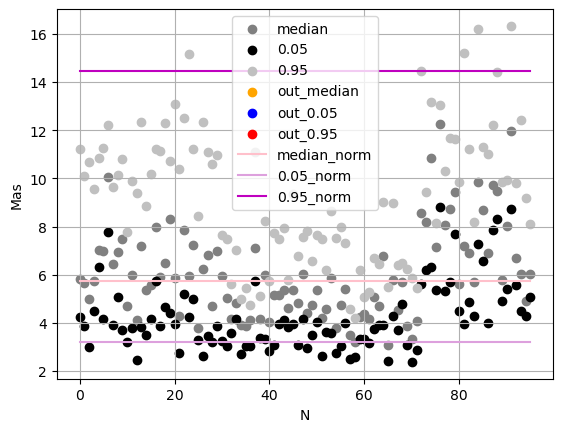

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 10 to 165128
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   msec      2153 non-null   int64  
 1   Corr      2153 non-null   float64
 2   Zyg       2153 non-null   float64
 3   Mas       2153 non-null   float64
 4   Valence   2153 non-null   float64
 5   Arousal   2153 non-null   float64
 6   filename  2153 non-null   object 
 7   label     2153 non-null   int64  
 8   batch_id  2153 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 168.2+ KB


In [76]:
df1 = graphic_med(df_new)
df1.info()

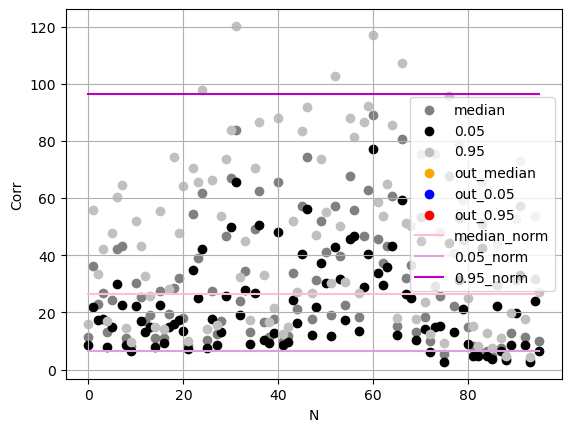

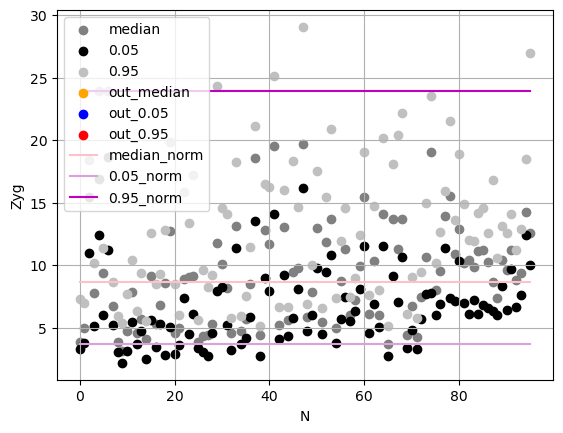

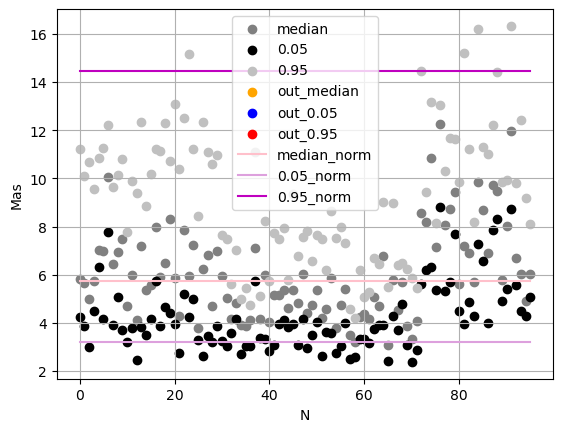

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 10 to 165128
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   msec      2153 non-null   int64  
 1   Corr      2153 non-null   float64
 2   Zyg       2153 non-null   float64
 3   Mas       2153 non-null   float64
 4   Valence   2153 non-null   float64
 5   Arousal   2153 non-null   float64
 6   filename  2153 non-null   object 
 7   label     2153 non-null   int64  
 8   batch_id  2153 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 168.2+ KB


In [77]:
df2 = graphic_med(df1)
df2.info()

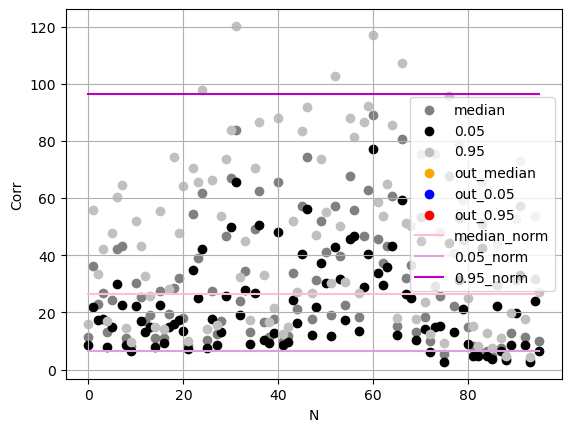

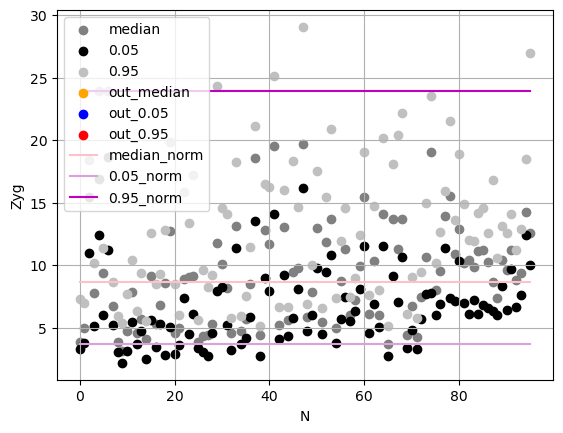

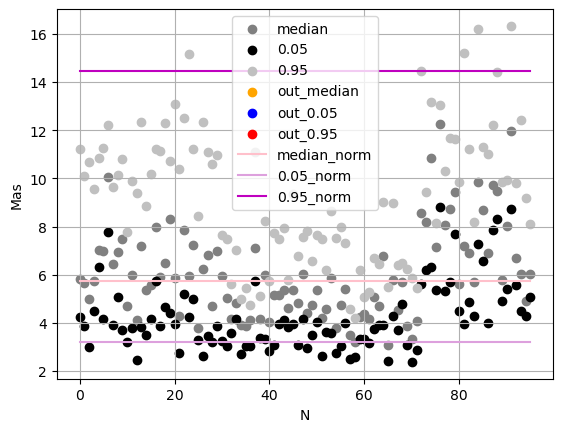

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 10 to 165128
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   msec      2153 non-null   int64  
 1   Corr      2153 non-null   float64
 2   Zyg       2153 non-null   float64
 3   Mas       2153 non-null   float64
 4   Valence   2153 non-null   float64
 5   Arousal   2153 non-null   float64
 6   filename  2153 non-null   object 
 7   label     2153 non-null   int64  
 8   batch_id  2153 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 168.2+ KB


In [78]:
df3 = graphic_med(df2)
df3.info()

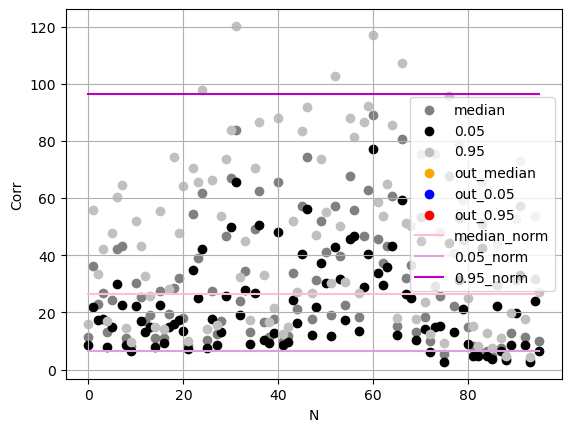

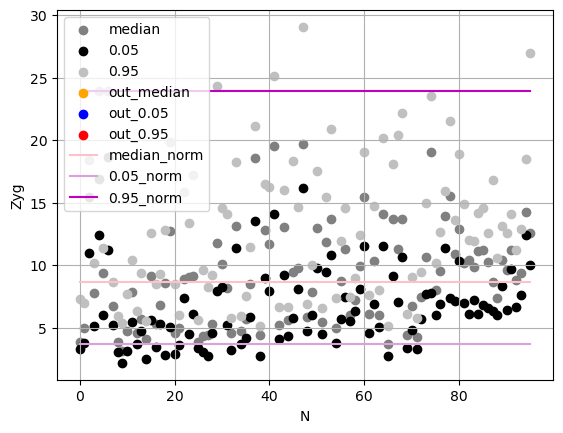

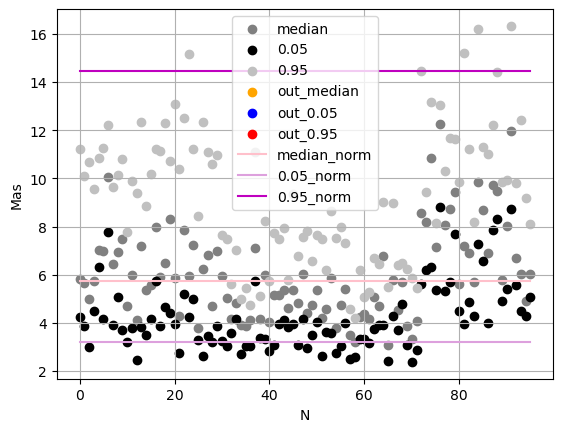

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 10 to 165128
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   msec      2153 non-null   int64  
 1   Corr      2153 non-null   float64
 2   Zyg       2153 non-null   float64
 3   Mas       2153 non-null   float64
 4   Valence   2153 non-null   float64
 5   Arousal   2153 non-null   float64
 6   filename  2153 non-null   object 
 7   label     2153 non-null   int64  
 8   batch_id  2153 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 168.2+ KB


In [79]:
df4 = graphic_med(df3)
df4.info()

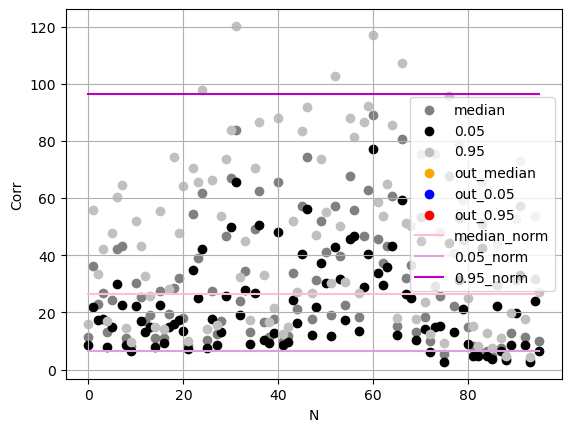

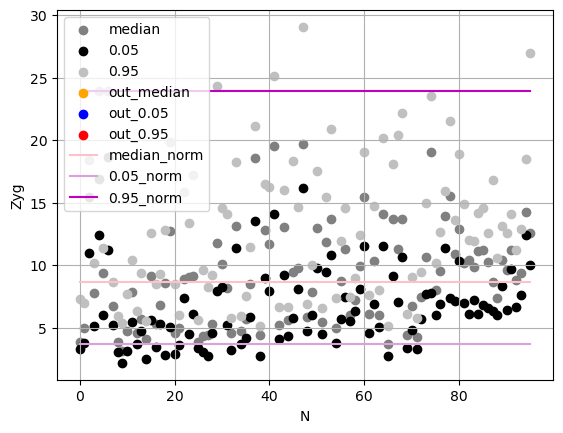

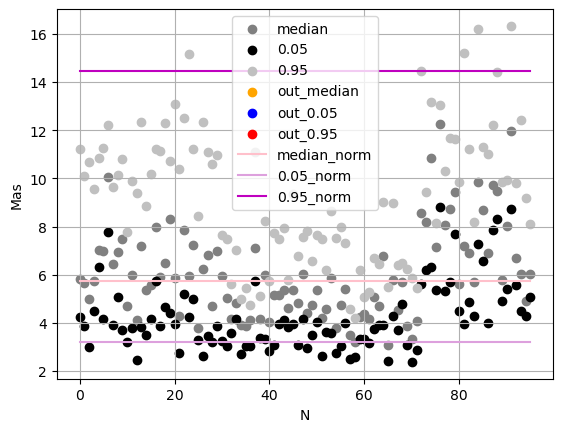

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 10 to 165128
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   msec      2153 non-null   int64  
 1   Corr      2153 non-null   float64
 2   Zyg       2153 non-null   float64
 3   Mas       2153 non-null   float64
 4   Valence   2153 non-null   float64
 5   Arousal   2153 non-null   float64
 6   filename  2153 non-null   object 
 7   label     2153 non-null   int64  
 8   batch_id  2153 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 168.2+ KB


In [80]:
df5 = graphic_med(df4)
df5.info()

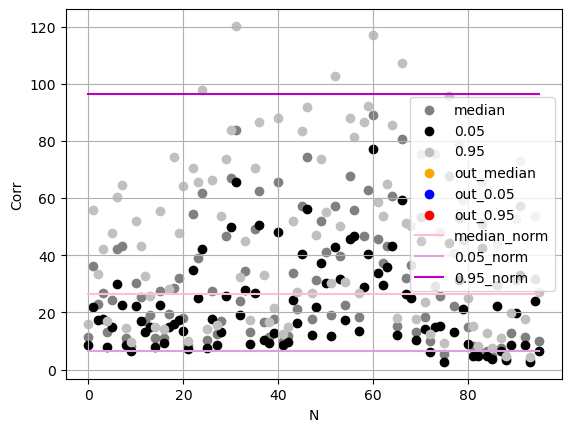

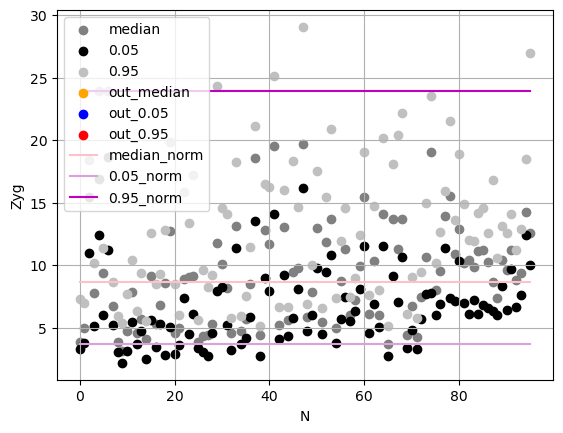

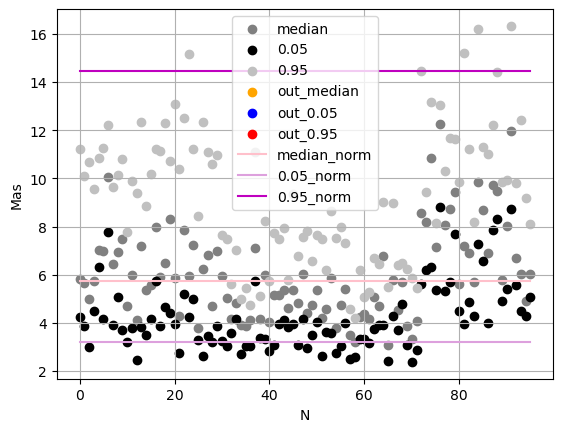

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 10 to 165128
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   msec      2153 non-null   int64  
 1   Corr      2153 non-null   float64
 2   Zyg       2153 non-null   float64
 3   Mas       2153 non-null   float64
 4   Valence   2153 non-null   float64
 5   Arousal   2153 non-null   float64
 6   filename  2153 non-null   object 
 7   label     2153 non-null   int64  
 8   batch_id  2153 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 168.2+ KB


In [81]:
df6 = graphic_med(df5)
df6.info()

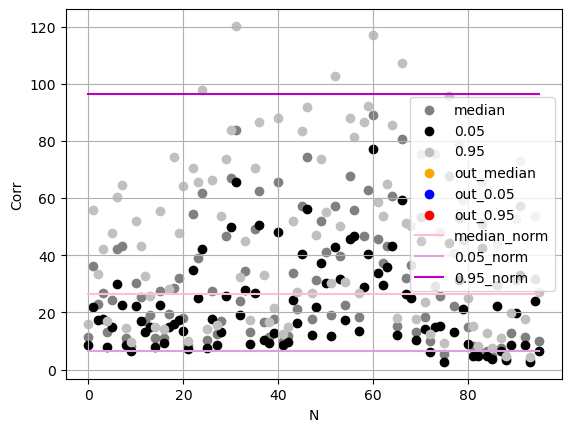

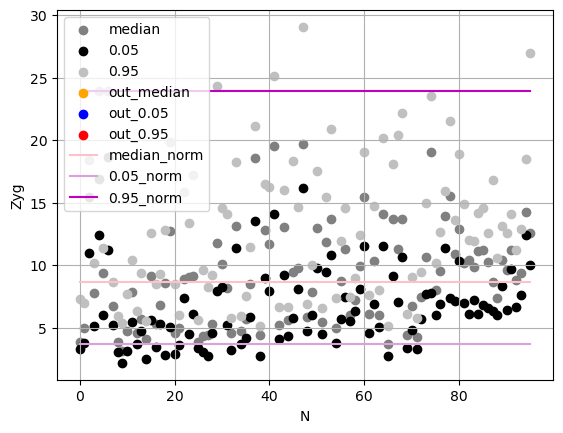

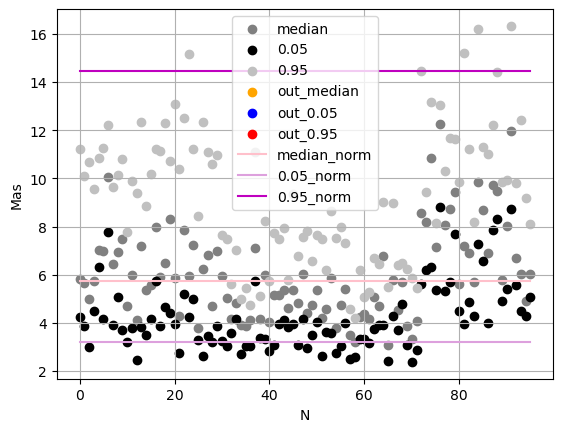

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 10 to 165128
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   msec      2153 non-null   int64  
 1   Corr      2153 non-null   float64
 2   Zyg       2153 non-null   float64
 3   Mas       2153 non-null   float64
 4   Valence   2153 non-null   float64
 5   Arousal   2153 non-null   float64
 6   filename  2153 non-null   object 
 7   label     2153 non-null   int64  
 8   batch_id  2153 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 168.2+ KB


In [84]:
df_new = graphic_med(df6)
df_new.info()

# Так выглядят распределения параметров после устранения всех выбросов. 
### Они стали лучше, но все еще смещены влево относительно нормального распределения. 

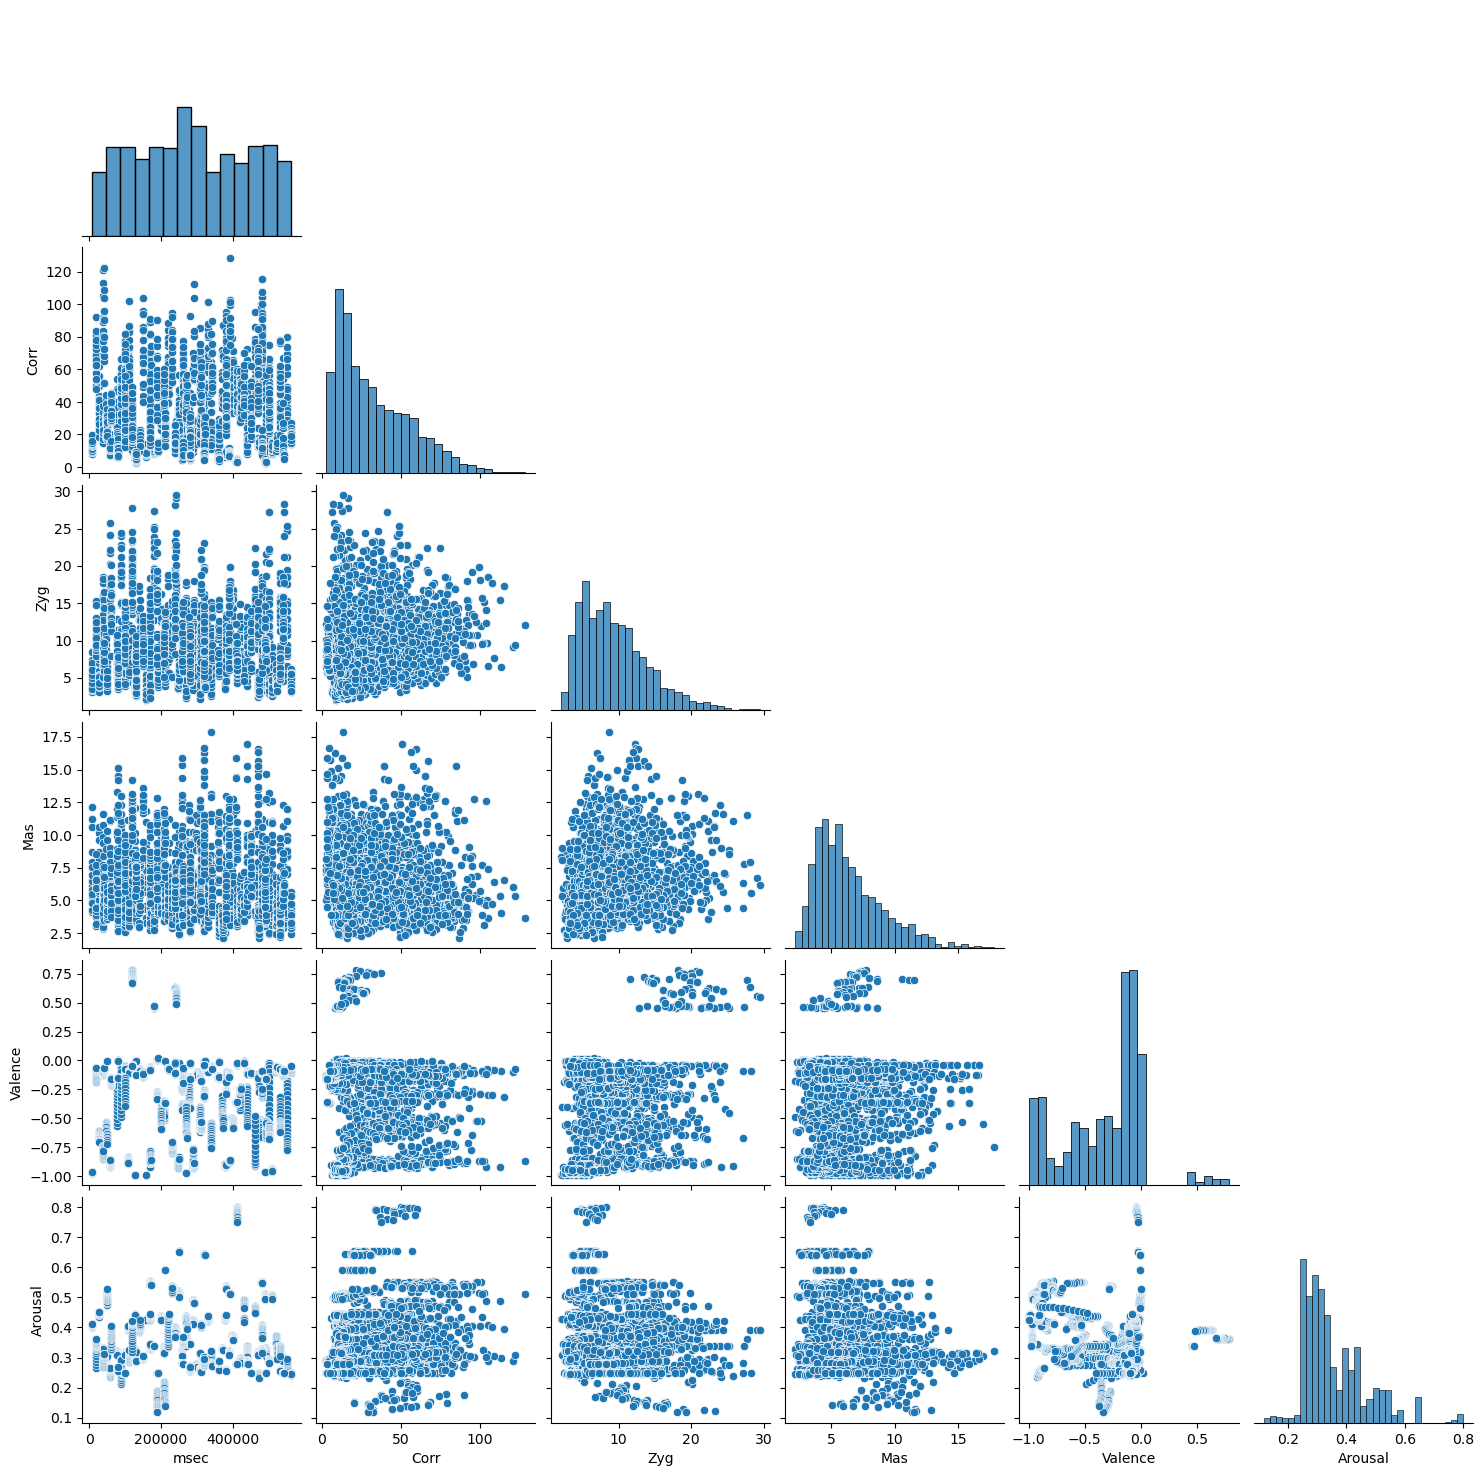

In [85]:
sns.pairplot(data = df_new.drop("label", axis = 1),  corner = True)

# Посмотрим на автокоррелеции

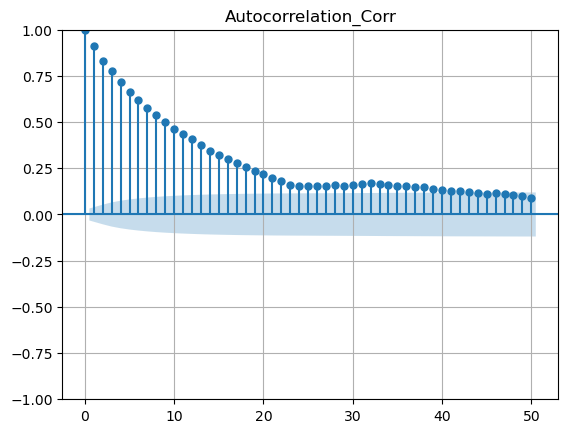

In [94]:
plot_acf(new_df['Corr'], lags = 50)
plt.title('Autocorrelation_Corr')
plt.grid()
plt.show()

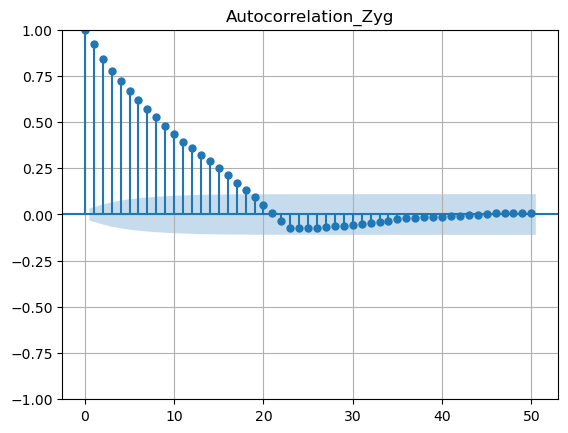

In [104]:
plot_acf(new_df['Zyg'], lags = 50)
plt.title('Autocorrelation_Zyg')
plt.grid()
plt.show()

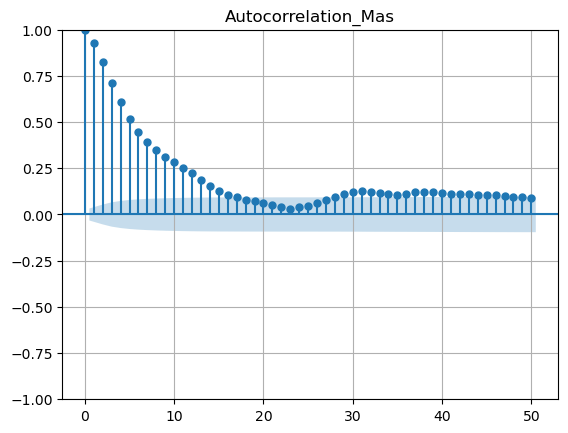

In [98]:
plot_acf(new_df['Mas'], lags = 50)
plt.title('Autocorrelation_Mas')
plt.grid()
plt.show()

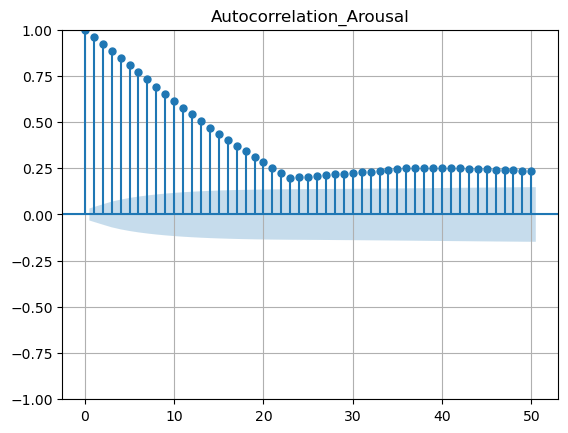

In [109]:
plot_acf(new_df['Arousal'], lags = 50)
plt.title('Autocorrelation_Arousal')
plt.grid()
plt.show()

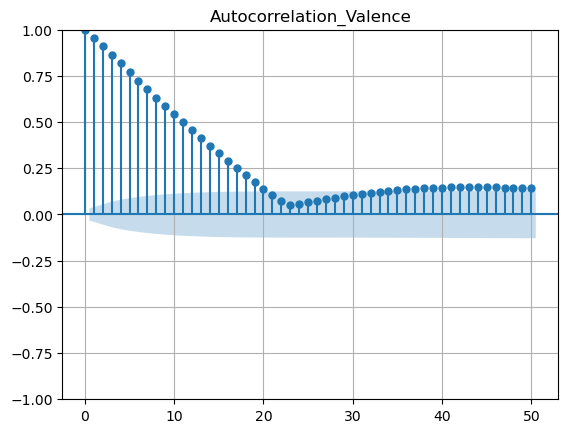

In [110]:
plot_acf(new_df['Valence'], lags = 50)
plt.title('Autocorrelation_Valence')
plt.grid()
plt.show()